<a href="https://colab.research.google.com/github/VAISU2221/Geospatial-analysis/blob/main/Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install folium

import folium
import json

# Load the GeoJSON data
try:
    with open('/Amsterdam parking.geojson') as f:
        data = json.load(f)
except Exception as e:
    print(f"Error loading GeoJSON: {e}")
    raise

# Create a map centered at a specific location
map = folium.Map(location=[48.853, 2.35], zoom_start=13)

# Iterate over the features and add them to the map
for feature in data['features']:
    try:
        if feature['geometry']['type'] == 'Polygon':
            coordinates = feature['geometry']['coordinates'][0]
            folium.Polygon(locations=coordinates, color='blue', fill=True, fill_color='blue').add_to(map)

            # Add marker for parking space with its name if 'name' property exists
            if 'name' in feature['properties']:
                center_lat = sum(p[1] for p in coordinates) / len(coordinates)
                center_lon = sum(p[0] for p in coordinates) / len(coordinates)
                folium.Marker([center_lat, center_lon], popup=feature['properties']['name'], icon=folium.Icon(color='blue')).add_to(map)

        elif feature['geometry']['type'] == 'MultiPolygon':
            coordinates = feature['geometry']['coordinates'][0][0]
            folium.Polygon(locations=coordinates, color='green', fill=True, fill_color='green').add_to(map)

            # Add marker for parking space with its name if 'name' property exists
            if 'name' in feature['properties']:
                center_lat = sum(p[1] for p in coordinates) / len(coordinates)
                center_lon = sum(p[0] for p in coordinates) / len(coordinates)
                folium.Marker([center_lat, center_lon], popup=feature['properties']['name'], icon=folium.Icon(color='green')).add_to(map)
    except Exception as e:
        print(f"Error processing feature: {e}")

# Display the map
map

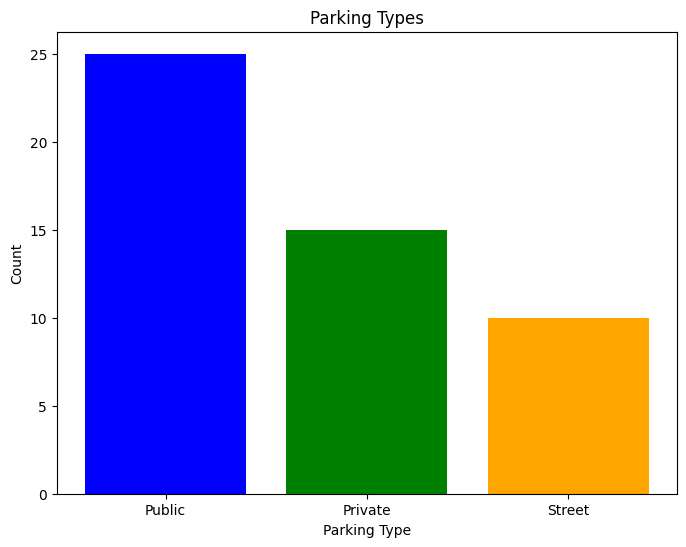

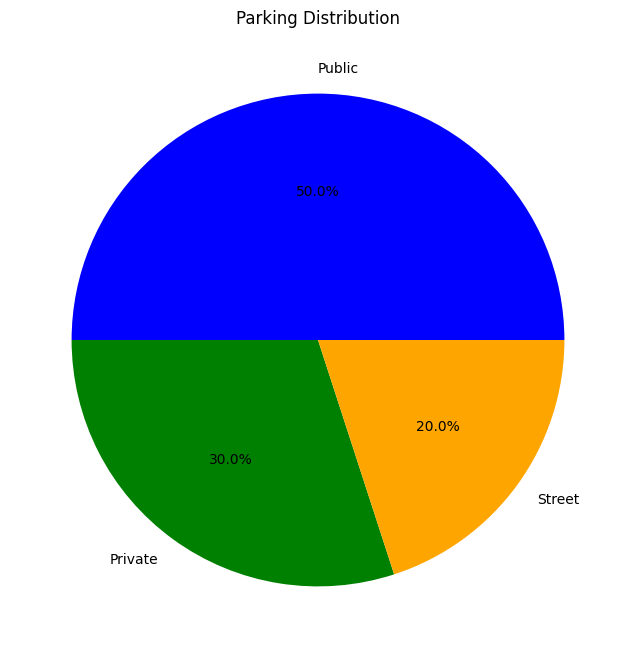

In [ ]:
import matplotlib.pyplot as plt

# Hypothetical data for demonstration
parking_types = ['Public', 'Private', 'Street']
parking_counts = [25, 15, 10]

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(parking_types, parking_counts, color=['blue', 'green', 'orange'])
plt.title('Parking Types')
plt.xlabel('Parking Type')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(parking_counts, labels=parking_types, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
plt.title('Parking Distribution')
plt.show()
